In [1]:
#  pip install openpyxl

In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\EHF-文献-数据-文章\EHF\06Compare')


In [2]:


# print(df['Date'])


df_EHF = pd.read_csv('ee-chart.csv',engine='python',encoding= "UTF-8")
df_EHF['Date'] = pd.to_datetime(df_EHF['Date'])

print(df_EHF.shape)
print(df_EHF.columns)


(153, 4)
Index(['Date', 'EHF', 'Tmax', 'Tmin'], dtype='object')


In [5]:

# 创建日期序列
dates = pd.date_range(start='2022-05-01', end='2022-09-30', freq='D')

# 创建空DataFrame
df_date = pd.DataFrame()

# 将日期序列添加为新列
df_date['Date'] = dates

# 将df_station_summer和新的date列按照date列进行合并
# df_merged = pd.merge(station_summer, df_date, on='Date', how='outer')

# station_summer = station_summer.set_index('Date')
# print("station_summer.dtypes:",station_summer.dtypes)
# print(df_merged.columns)

# 构建零值线条
zeros = pd.DataFrame({'value': [0] * 153})
df_zeros = pd.concat([df_date, zeros], axis=1, ignore_index=True, keys=['Date', 'value'])
df_zeros.columns = ['Date', 'value']
print("zero.dtypes:",zeros.dtypes)
print(df_zeros)


zero.dtypes: value    int64
dtype: object
          Date  value
0   2022-05-01      0
1   2022-05-02      0
2   2022-05-03      0
3   2022-05-04      0
4   2022-05-05      0
..         ...    ...
148 2022-09-26      0
149 2022-09-27      0
150 2022-09-28      0
151 2022-09-29      0
152 2022-09-30      0

[153 rows x 2 columns]


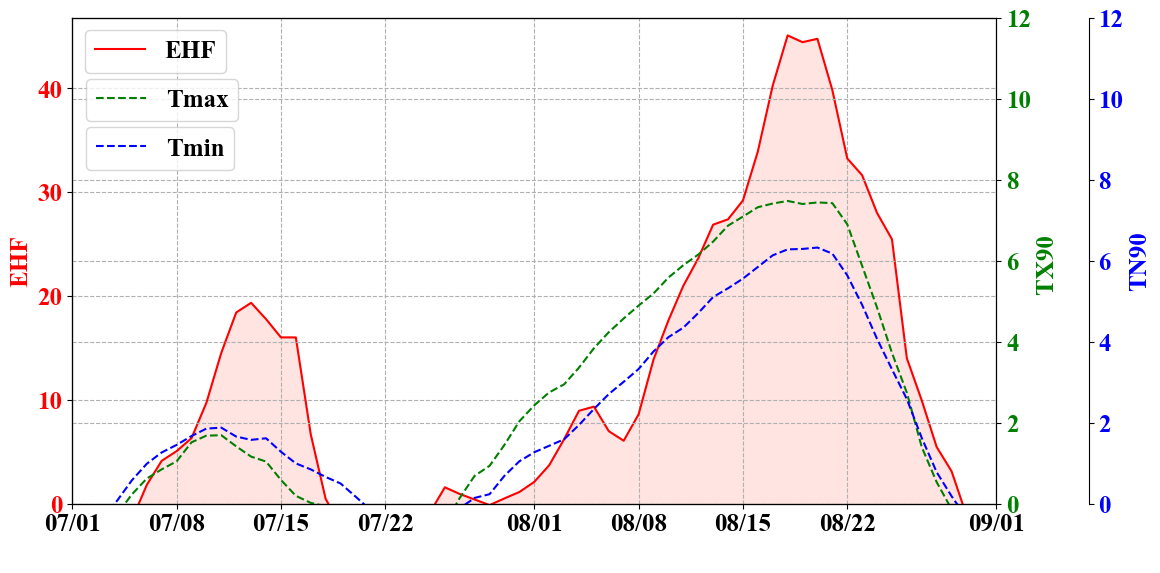

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建画布和子图对象
fig, ax1 = plt.subplots(figsize=(12,6))
plt.subplots_adjust(left=0.08, right=0.85, top=0.9, bottom=0.09)
ax1.grid(axis='y', linestyle='--')

ax1.grid(axis='x', linestyle='--')

# 绘制EHF曲线，设置左边Y轴
sns.lineplot(x=df_EHF['Date'], y= df_EHF['EHF'],data=df_EHF,label="EHF", ax=ax1, color='red')
# 使用fill_between填充大于0的部分
ax1.fill_between(df_EHF['Date'], df_EHF['EHF'], where=df_EHF['EHF']>0, interpolate=True, color='mistyrose')
# sns.lineplot(x=df_zeros['Date'], y= df_zeros['value'],data=df_zeros,label="EHF", ax=ax1, color='black')
ax1.set_ylabel('EHF', fontsize=18,color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xlabel(' ', fontsize=18,color='black')
# 创建第二个坐标轴，绘制温度曲线，设置右边Y轴
ax2 = ax1.twinx()
# ax2.spines['right'].set_position(('axes', 1.1))


ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))

sns.lineplot(x=df_EHF['Date'], y= df_EHF['Tmax'],data=df_EHF,label="Tmax",ax=ax2, color='green',linestyle='dashed')
# ax2.fill_between(df_EHF['Date'], df_EHF['Tmax'], where=df_EHF['Tmax']>0, interpolate=True,alpha=0.1, color='green')

sns.lineplot(x=df_EHF['Date'], y= df_EHF['Tmin'],data=df_EHF,label="Tmin",ax=ax3, color='blue',linestyle='dashed')
# sns.lineplot(x=df_zeros['Date'], y= df_zeros['value'],data=df_zeros, ax=ax3, color='black')
ax2.set_ylabel('TX90 ',  fontsize=18,color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax3.set_ylabel('TN90',  fontsize=18,color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax2.grid(axis='y', linestyle='--')
# ax3.grid(axis='y', linestyle='--')
# 设置坐标轴范围
# ax1.set_ylim([-40, 50])  # 左边Y轴对应EHF的范围
# ax2.set_ylim([-20, 25])  # 右边Y轴对应温度的范围
# ax3.set_ylim([-20, 25])  # 右边Y轴对应温度的范围

# ax1.set_ylim([-46.8, 46.8])  # 左边Y轴对应EHF的范围
# ax2.set_ylim([-12, 12])  # 右边Y轴对应温度的范围
# ax3.set_ylim([-12, 12])  # 右边Y轴对应温度的范围
# ax1.set_xlim(['2022-07-01', '2022-09-30'])
import matplotlib.dates as mdates

# 设置横坐标格式
date_fmt = mdates.DateFormatter('%m/%d')  # 格式化日期显示
ax1.xaxis.set_major_formatter(date_fmt)

# 设置横坐标范围
start_date = pd.Timestamp('2022-07-01')  # 开始日期
end_date = pd.Timestamp('2022-09-01')  # 结束日期
ax1.set_xlim([start_date, end_date])


ax1.set_ylim([0, 46.8])  # 左边Y轴对应EHF的范围
ax2.set_ylim([0, 12])  # 右边Y轴对应温度的范围
ax3.set_ylim([0, 12])  # 右边Y轴对应温度的范围

# 设置图例
ax1.legend(['EHF'], loc='upper left')
# # ax2.legend(['Temperature'], loc='upper right')
ax2.legend( loc='upper left',bbox_to_anchor=(0.001, 0.9))
# ax3.legend( loc='upper right')
ax3.legend( loc='upper left',bbox_to_anchor=(0.001, 0.8))


# 设置横坐标标签旋转角度，避免重叠
plt.xticks(rotation=45, ha='right')

# 添加标题
# plt.title('EHF and Temperature Changes from May 1 to September 30, 2022', fontsize=16)

# 显示图形



'''
HWA: 45.09394799476538;
HWD: 31;
HWF: 47;
HWM: 10.404891698137329;
HWN: 3
'''
plt.savefig('06 EHF-MAX-MIN 2022-07-09 for Caoshang station-renew label.png', dpi=300)
plt.show()